# Biostat Homework 6 
J. Cristiano      

### Question 1 
A research study was conducted to examine the clinical efficacy of a new antidepressant. Depressed patients were randomly assigned to one of three groups: a placebo group, a group that received a low dose of the drug, and a group that received a moderate dose of the drug. After four weeks of treatment, the patients completed the Beck Depression Inventory. The higher the score, the more depressed the patient. The data are presented below. Compute the appropriate test.
| **Placebo** | **Low Dose** | **Moderate Dose** |
| --- | --- | --- |
| 38 | 22 | 14 |
| 47 | 19 | 26 |
| 39 | 8 | 11 |
| 25 | 23 | 18 |
| 42 | 31 | 5 |

In [24]:
import pandas as pd

data = {
    "Placebo": [38, 47, 39, 25, 42],
    "Low Dose": [22, 19, 8, 23, 31],
    "Moderate Dose": [14, 26, 11, 18, 5]
}

df = pd.DataFrame(data)

# print(df)

#### a) What would be the null hypothesis in this study?
The null hypothesis would be that all three groups have the same variance in depression score. 

#### b) What is the alternative hypothesis?
That one of the groups has a statistically significant variance in depression score. 

#### c) What probability level did you choose and why?
0.05 because its standard

#### d) What is your one-way ANOVA Table?

In [2]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from pprint import pprint

# Melt the dataframe to long format
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Placebo', 'Low Dose', 'Moderate Dose'])
df_melt.columns = ['index', 'Treatment', 'Score']


# Perform one-way ANOVA
model = ols('Score ~ C(Treatment)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table = anova_table.fillna(' ')
pprint(anova_table)

                   sum_sq    df          F    PR(>F)
C(Treatment)  1484.933333   2.0  11.266566  0.001761
Residual       790.800000  12.0                     


#### e) Is there a significant difference between the groups?
Yes, F-statistic (11.3) shows high differences in variance between the treatment groups (pval < .002) 

#### f) If there is a significant difference, where specifically are the differences?
In order to solve this question, I will use Turkey's HSD

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_melt['Score'], groups=df_melt['Treatment'], alpha=0.05)

print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
     Low Dose Moderate Dose     -5.8  0.515 -19.4973  7.8973  False
     Low Dose       Placebo     17.6 0.0129   3.9027 31.2973   True
Moderate Dose       Placebo     23.4 0.0018   9.7027 37.0973   True
-------------------------------------------------------------------


Given the results of turkey HSD, there are no significant differences in the amount of medication administered, but there are significant differences between treated groups and placebo.

#### f) Interpret your answer.
My interpretation of this is that the drug is effective, however, moderate doses do not have a significant impact when compared with lower doses, so this drug is most efficiently used in lower doses. 

#### g) Check assumptions of your model?
The assumptions of one way ANOVA are such:     
- Normality   (confirm with Shapiro-wilk test)
- Independence   (confirm with Pearsons coorellation coeficient)
- Homoscedasticity (confirm with Lavene's test )
- Equal sample sizes (confirmed visually, the data table has an equal number of samples per group)

In [4]:
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import levene

# Perform Shapiro-Wilk test for each group
shapiro_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column])
    shapiro_results[column] = {'statistic': stat, 'p_value': p_value}

# pprint(shapiro_results)
# Print results in a table format
print("Shapiro test for all 3 groups")
shapiro_df = pd.DataFrame(shapiro_results).T
print(shapiro_df)

# Perform Pearson correlation analysis for each pair of groups
pearson_results = {}
groups = df.columns

for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        corr, p_value = pearsonr(df[group1], df[group2])
        pearson_results[f'{group1} vs {group2}'] = {'correlation': corr, 'p_value': p_value}

# Print results in a table format
print("Pearson correlation analysis for all group pairs")
pearson_df = pd.DataFrame(pearson_results).T
print(pearson_df)

# Perform Levene's test for homogeneity of variances
stat, p_value = levene(df['Placebo'], df['Low Dose'], df['Moderate Dose'])

levene_results = {'statistic': stat, 'p_value': p_value}

# Print results
print("Levene's test for homogeneity of variances")
levene_df = pd.DataFrame([levene_results])
print(levene_df)

Shapiro test for all 3 groups
               statistic   p_value
Placebo         0.910683  0.471707
Low Dose        0.952858  0.757580
Moderate Dose   0.992005  0.986223
Pearson correlation analysis for all group pairs
                           correlation   p_value
Placebo vs Low Dose          -0.061041  0.922329
Placebo vs Moderate Dose      0.063132  0.919671
Low Dose vs Moderate Dose    -0.250039  0.684989
Levene's test for homogeneity of variances
   statistic   p_value
0   0.006501  0.993524


The Shapiro tests testing for divergence from normal distributions all fail (pval > 0.05) so we can not reject the null hypothesis of Shapiro-wilk test, which means that all groups are normally distributed.      
The pearson correlation tests also fail (pval > 0.05) so all groups are independent from each other.      
Lavene's test for homogeneity of variances in the groups confirms that the variances between groups is different (pval > 0.05)      

These tests confirm our assumptions used for the one way anova, so we can accept the results!

### Question 2
Researchers have sought to examine the effect of various types of music on agitation levels in patients who are in the early and middle stages of Alzheimer's disease. Patients were selected to participate in the study based on their stage of Alzheimer's disease. Three forms of music were tested: Easy listening, Mozart, and piano interludes. While listening to music, agitation levels were recorded for the patients with a high score indicating a higher level of agitation. Scores are recorded below.       


| Group                     | Piano Interlude | Mozart | Easy Listening |
|---------------------------|-----------------|--------|----------------|
| Early Stage Alzheimer's   | 21             | 9      | 29             |
|                           | 24             | 12     | 26             |
|                           | 22             | 10     | 30             |
|                           | 18             | 5      | 24             |
|                           | 20             | 9      | 26             |
| Middle Stage Alzheimer's  | 22             | 14     | 15             |
|                           | 20             | 18     | 18             |
|                           | 25             | 11     | 20             |
|                           | 18             | 9      | 13             |
|                           | 20             | 13     | 19             |


In [5]:
data = {
    "Group": [
        "Early Stage Alzheimer's", "Early Stage Alzheimer's", 
        "Early Stage Alzheimer's", "Early Stage Alzheimer's", 
        "Early Stage Alzheimer's", "Middle Stage Alzheimer's", 
        "Middle Stage Alzheimer's", "Middle Stage Alzheimer's", 
        "Middle Stage Alzheimer's", "Middle Stage Alzheimer's"
    ],
    "Piano_Interlude": [21, 24, 22, 18, 20, 22, 20, 25, 18, 20],
    "Mozart": [9, 12, 10, 5, 9, 14, 18, 11, 9, 13],
    "Easy_Listening": [29, 26, 30, 24, 26, 15, 18, 20, 13, 19]
}

df_music = pd.DataFrame(data)
# print(df_music)

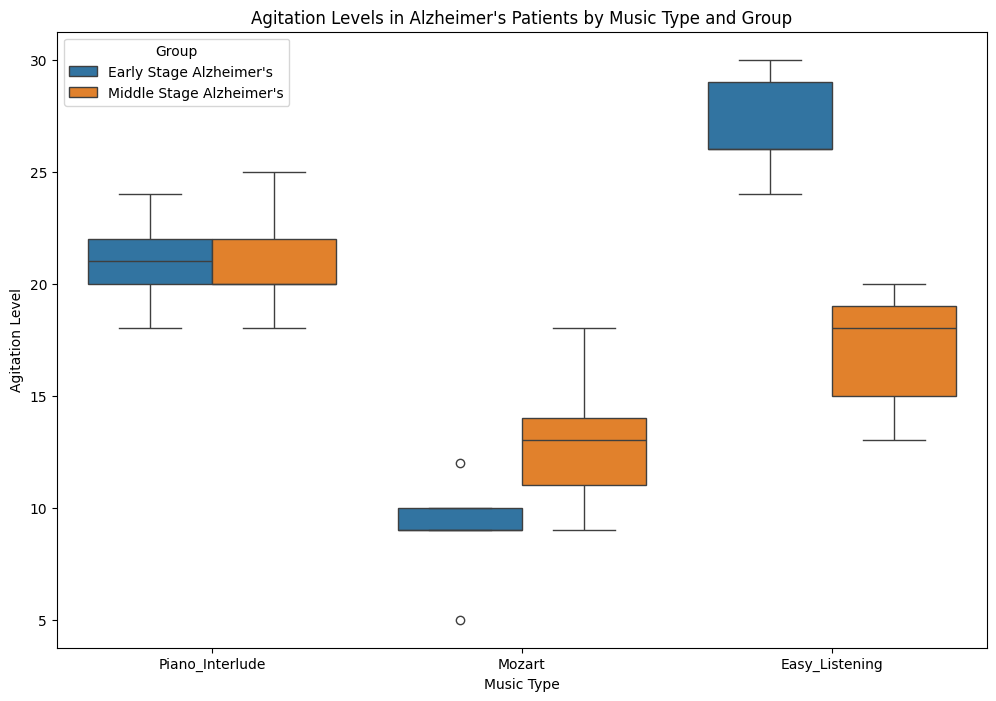

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

# Melt the dataframe to long format for easier plotting
df_music_melt = pd.melt(df_music, id_vars=['Group'], value_vars=['Piano_Interlude', 'Mozart', 'Easy_Listening'])
df_music_melt.columns = ['Group', 'Music_Type', 'Agitation_Level']
# print(df_music_melt)
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='Music_Type', y='Agitation_Level', hue='Group', data=df_music_melt)

# Set the title and labels
plt.title("Agitation Levels in Alzheimer's Patients by Music Type and Group")
plt.xlabel("Music Type")
plt.ylabel("Agitation Level")

# Show the plot
plt.show()

#### b) Complete the ANOVA table.

In [7]:
# Perform two-way ANOVA
model_music_two_way = ols('Agitation_Level ~ C(Music_Type) + C(Group) + C(Music_Type):C(Group)', data=df_music_melt).fit()
anova_table_music_two_way = sm.stats.anova_lm(model_music_two_way, typ=2)
anova_table_music_two_way = anova_table_music_two_way.fillna(' ')
print(anova_table_music_two_way)


                        sum_sq    df         F    PR(>F)
C(Music_Type)            740.0   2.0  49.88764       0.0
C(Group)                  30.0   1.0  4.044944  0.055664
C(Music_Type):C(Group)   260.0   2.0  17.52809   0.00002
Residual                 178.0  24.0                    


#### c) Are there any significant main effects or an interaction effect. 
#### d)Interpret your answer

According to the table. There are significant differences in agitation level due to music type (F-stat = 50 & pval < 0.05) which is supported by the boxplot, agitation does change significantly with the different music types. However, the difference between the groups, Early stage and late stage, is less significant (F-stat 4 & P-val > 0.05) which indicates that agitation is not significantly varied among the 2 groups. So the interaction between the 2 variables here, while significant (F-stat 18 & Pval < 0.05) is more explained by the variation among music types than the grouping.       

#### e) Check the assumptions of your model.
I will follow the same regimen as the previous question.      
- Normality   (confirm with Shapiro-wilk test)
- Independence   (confirm with Pearsons coorellation coeficient)
- Homoscedasticity (confirm with Lavene's test )
- Equal sample sizes (confirmed visually, the data table has an equal number of samples per group)

In [8]:
# Perform Shapiro-Wilk test for each group and music type
print("Shapiro tests for each group")
shapiro_results_music = {}
for group in df_music['Group'].unique():
    for music_type in ['Piano_Interlude', 'Mozart', 'Easy_Listening']:
        stat, p_value = shapiro(df_music[df_music['Group'] == group][music_type])
        shapiro_results_music[f'{group} - {music_type}'] = {'statistic': stat, 'p_value': p_value}

# Print results in a table format
shapiro_music_df = pd.DataFrame(shapiro_results_music).T
print(shapiro_music_df)

# Perform Pearson correlation analysis for each pair of music types within each group
print("Pearson Correlations for each group")
pearson_results_music = {}
for group in df_music['Group'].unique():
    for i in range(1, len(df_music.columns) - 1):
        for j in range(i + 1, len(df_music.columns)):
            music_type1 = df_music.columns[i]
            music_type2 = df_music.columns[j]
            corr, p_value = pearsonr(df_music[df_music['Group'] == group][music_type1], df_music[df_music['Group'] == group][music_type2])
            pearson_results_music[f'{group} - {music_type1} vs {music_type2}'] = {'correlation': corr, 'p_value': p_value}


# Print results in a table format
pearson_music_df = pd.DataFrame(pearson_results_music).T
print(pearson_music_df.to_string())

# Perform Levene's test for homogeneity of variances for each group
print("Levene's test for each group")
levene_results_music = {}
for group in df_music['Group'].unique():
    stat, p_value = levene(
        df_music[df_music['Group'] == group]['Piano_Interlude'],
        df_music[df_music['Group'] == group]['Mozart'],
        df_music[df_music['Group'] == group]['Easy_Listening'])
    levene_results_music[group] = {'statistic': stat, 'p_value': p_value}
# Print results in a table format
levene_music_df = pd.DataFrame(levene_results_music).T
print(levene_music_df)


Shapiro tests for each group
                                            statistic   p_value
Early Stage Alzheimer's - Piano_Interlude    0.999293  0.999803
Early Stage Alzheimer's - Mozart             0.921139  0.537315
Early Stage Alzheimer's - Easy_Listening     0.925090  0.563289
Middle Stage Alzheimer's - Piano_Interlude   0.941794  0.678647
Middle Stage Alzheimer's - Mozart            0.977570  0.921218
Middle Stage Alzheimer's - Easy_Listening    0.928264  0.584579
Pearson Correlations for each group
                                                               correlation   p_value
Early Stage Alzheimer's - Piano_Interlude vs Mozart           9.647638e-01  0.007898
Early Stage Alzheimer's - Piano_Interlude vs Easy_Listening   4.564355e-01  0.439710
Early Stage Alzheimer's - Mozart vs Easy_Listening            4.803845e-01  0.412770
Middle Stage Alzheimer's - Piano_Interlude vs Mozart          5.551115e-17  1.000000
Middle Stage Alzheimer's - Piano_Interlude vs Easy_Listening  

Shapiro tests all fail to reject the null hypothesis, which means that all groups follow the normal distribution.      
Pearson coorelations show the only statistically significant relationship is between early stage patients listening to Mozart and Easy listening, note that this relationship has a very small correlation (coorelation coeficient 9.6 e-1 & pval 0.008).     
Lavene's test between early stage and middle stage patients shows no significant differences in variance.


The assumptions hold, we can accept the results of this test!


### Question 3
We have census data recording the death rate (drate, per 100,000 population) and specific age range (age) for each state. The dataset also includes the region of the country in which each state is located (region).

Age is in integral years from 24 to 35, and region is coded from 1 to 4, with 1 standing for the Northeast, 2 for the North Central, 3 for the South, and 4 for the West.
#### a) State the analysis of covariance model for a single-factor study with four groups and a continuous variable. Specify your dependent variable, factor variable, and covariate.

The analysis of covariance (ANCOVA) model for a single-factor study with four groups and a continuous variable can be specified as follows:

Dependent variable: `drate` (death rate)
Factor variable: `region` (coded from 1 to 4)
Covariate: `age` (continuous variable)

The ANCOVA model can be written as:

$$
\text{drate} = \beta_0 + \beta_1 \cdot \text{region} + \beta_2 \cdot \text{age} + \epsilon
$$

where:
- $\text{drate}$ is the dependent variable (death rate)
-  $\text{region}$ is the factor variable (with four levels: Northeast, North Central, South, and West)
- $\text{age}$ is the covariate (continuous variable)
- $\beta_0$ is the intercept
- $\beta_1$ and $\beta_2$ are the coefficients for the factor variable and covariate, respectively
- $\epsilon$ is the error term


In [12]:
# Load the data into a dataframe
census_df = pd.read_csv('./BiostatHW6/CensusData.csv')

# Display the first few rows of the dataframe
# print(census_df.head())
region_mapping = {'NE': 1, 'N Cntrl': 2, 'South': 3, 'West': 4}
census_df['region'] = census_df['region'].map(region_mapping)

# print(census_df.head())
# Define the ANCOVA model
model = ols('drate ~ C(region) + age', data=census_df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  drate   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     28.97
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           6.12e-12
Time:                        13:38:24   Log-Likelihood:                -167.12
No. Observations:                  50   AIC:                             344.2
Df Residuals:                      45   BIC:                             353.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -28.6028     21.939     -1.

#### b)Check the Assumptions of your ANCOVA model. 

The original table confirms several assumptions of ANCOVA. First, the normality of residuals is supported by the Omnibus (p = 6.658) and Jarque-Bera (p = 5.590) tests, indicating no significant departure from normality. Second, the independence of observations is partially addressed by the Durbin-Watson statistic (1.954), which shows no significant autocorrelation in the residuals. Finally, the absence of severe multicollinearity is suggested by the condition number (642).

I will perform more explicit checks of:     
- linearity 
- homogeneity of regression slopes
- homogeneity of varience

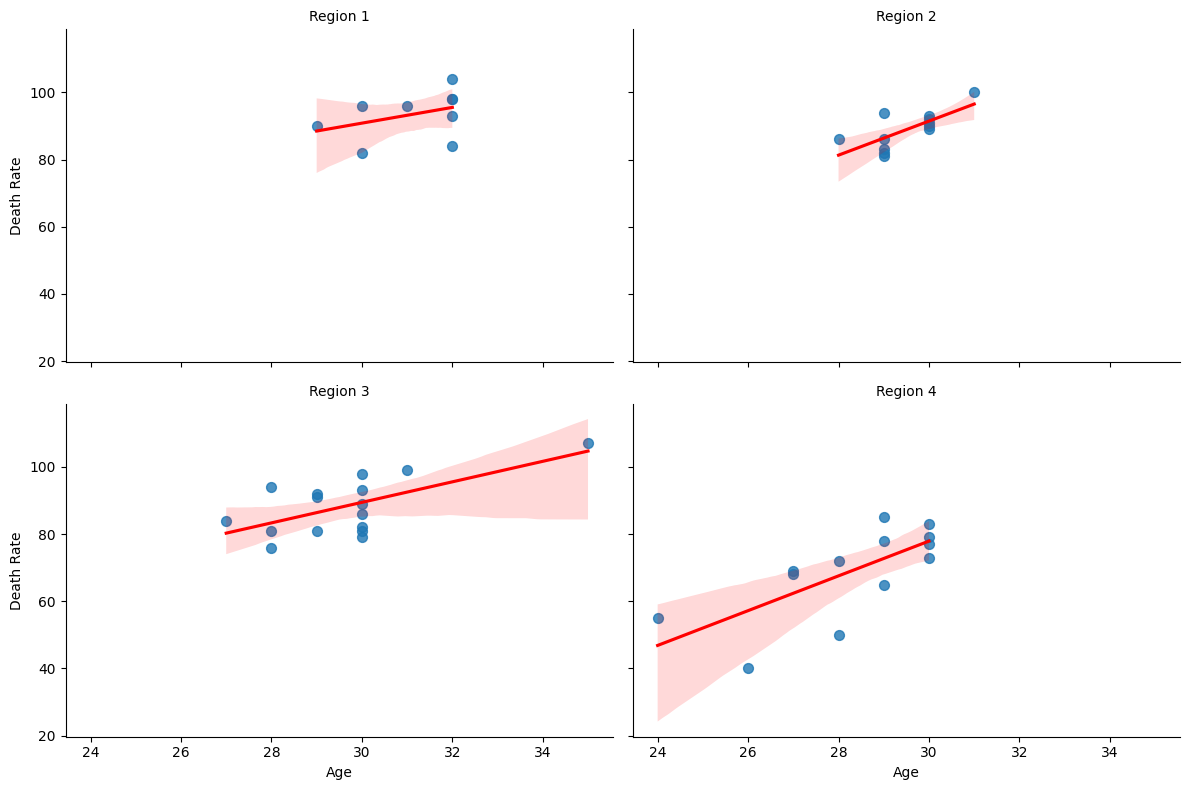

In [11]:
# Drop rows with missing region values
census_df_clean = census_df


# Create a FacetGrid with a plot for each region
g = sns.FacetGrid(census_df_clean, col="region", col_wrap=2, height=4, aspect=1.5)

# Map the scatter plot with a regression line to each subplot
g.map(sns.regplot, "age", "drate", scatter_kws={"s": 50}, line_kws={"color": "red"})

# Set the titles and labels
g.set_titles("Region {col_name}")
g.set_axis_labels("Age", "Death Rate")

# Show the plot
plt.show()

From the plots, we see that Death rate Vs Age has a linear relationship (with some outliers) for each region. This supports the assumption of linearity for ANCOVA.

In [20]:
# Fit the interaction model
model_interaction = ols('drate ~ C(region) * age', data=census_df).fit()

# Extract only the interaction terms
interaction_terms = model_interaction.pvalues.filter(like=':age')

# Print the interaction p-values
print("P-values for interaction terms (homogeneity of regression slopes):")
print(interaction_terms)

P-values for interaction terms (homogeneity of regression slopes):
C(region)[T.2]:age    0.442177
C(region)[T.3]:age    0.772586
C(region)[T.4]:age    0.259362
dtype: float64


These P-values (> 0.05) indicate that the assumption of homogeneity of regression slopes holds.

In [19]:
from scipy.stats import levene

stat, p_value = levene(census_df['drate'][census_df['region'] == 1],
                        census_df['drate'][census_df['region'] == 2],
                        census_df['drate'][census_df['region'] == 3],
                        census_df['drate'][census_df['region'] == 4])

levene_results = {'statistic': stat, 'p_value': p_value}

# Print results in a table format
levene_df = pd.DataFrame([levene_results])
print("Levene test across the regions")
print(levene_df)


Levene test across the regions
   statistic   p_value
0   1.979761  0.130189


The levene tests show that the groups have equal variances and so the assumption holds

All asumptions are confirmed and so we can accept this result!

#### c) Conduct your analysis for testing whether or not the variable group has effects. State the hypotheses, significant level, decision rule, and your conclusion. What is p-value of test?
I'll use a type 2 ANOVA      

Hypotheses 
- **Null Hypothesis ($H_0$)**: The variable `region` has no effect on the death rate $drate\)); i.e., the group means are equal across all levels of `region`.
  $$
  H_0: \mu_{\text{region}_1} = \mu_{\text{region}_2} = \mu_{\text{region}_3} = \mu_{\text{region}_4}
  $$
- **Alternative Hypothesis ($H_1$)**: The variable `region` has a significant effect on the death rate $drate\)); i.e., at least one group mean differs.

 Decision Rule
1. Conduct an **F-test** for the variable `region`.
2. If the p-value for `region` is less than $alpha = 0.05$, reject the null hypothesis $H_0$. Otherwise, fail to reject $H_0$.

Significance level 
$alpha = 0.05$


In [22]:
# Perform ANOVA to test the effect of region
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
anova_table = anova_table.fillna(' ')
print(anova_table)

                sum_sq    df          F    PR(>F)
C(region)  1645.662276   3.0   10.53823  0.000023
age        1630.466623   1.0  31.322768  0.000001
Residual   2342.417458  45.0                     


Based on the ANOVA results, the effect of region on the death rate (drate) is statistically significant (F-stat=10.54, p=0.000023). Therefore, we reject the null hypothesis and conclude that the death rate differs across the regions, even after accounting for the covariate age.     

#### d) Make all pairwise comparisons between the group effects with 95% confidence interval. State your findings. 

For these comparisons, I will use Turkey's HSD again. 


In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=census_df['drate'], 
                                  groups=census_df['region'], 
                                  alpha=0.05)

# Print results
print(tukey_results)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  -4.5278 0.6884  -15.451   6.3954  False
     1      3  -5.1319 0.5519 -15.4534   5.1895  False
     1      4 -24.6752    0.0 -35.4169 -13.9336   True
     2      3  -0.6042 0.9982 -10.0639   8.8556  False
     2      4 -20.1474    0.0  -30.064 -10.2309   True
     3      4 -19.5433    0.0 -28.7928 -10.2937   True
------------------------------------------------------


 Findings    
1. There is no significant difference in death rates between:
   - Region 1 and Region 2 (\(p = 0.6884\)).
   - Region 1 and Region 3 (\(p = 0.5519\)).
   - Region 2 and Region 3 (\(p = 0.9982\)).

2. There are significant differences in death rates between:
   - Region 1 and Region 4 (\(p < 0.0001\)), with a mean difference of \(-24.68\) (95% CI: \(-35.42\), \(-13.93\)).
   - Region 2 and Region 4 (\(p < 0.0001\)), with a mean difference of \(-20.15\) (95% CI: \(-30.06\), \(-10.23\)).
   - Region 3 and Region 4 (\(p < 0.0001\)), with a mean difference of \(-19.54\) (95% CI: \(-28.79\), \(-10.29\)).

 Conclusion     
The analysis shows that Region 4 has significantly lower death rates compared to Regions 1, 2, and 3. However, there are no significant differences in death rates between Regions 1, 2, and 3. These results highlight the substantial impact of regional differences on death rates, particularly for Region 4.
